In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte

In [2]:
IMAGE_PATH = 'piova_night.png'

In [3]:
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)

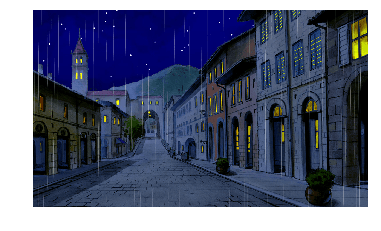

In [4]:
plt.imshow(img[..., ::-1], cmap='gray')
plt.axis('off')
plt.show()

In [5]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [6]:
hue, saturation, value = np.moveaxis(hsv_img, -1, 0)

In [7]:
#Segment the windows
mask_img = hue > 20
mask_img &= hue < 50
mask_img &= value > 100
mask_img = img_as_ubyte(mask_img)

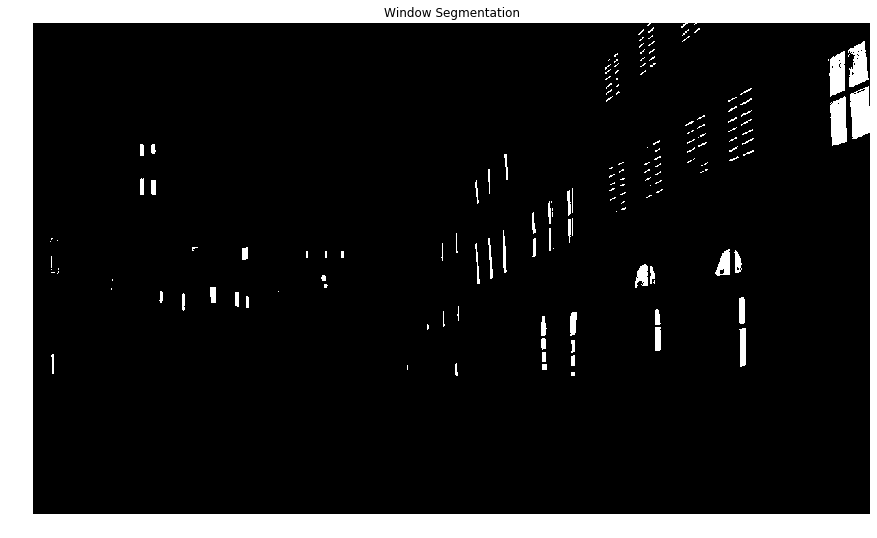

In [8]:
plt.figure(figsize=(15, 15))
plt.imshow(mask_img, cmap='gray')
plt.title('Window Segmentation')
plt.axis('off')
plt.show()

In [9]:
kernel = np.ones((5, 5), np.uint8)

In [10]:
eroded_img = cv2.erode(mask_img, kernel)

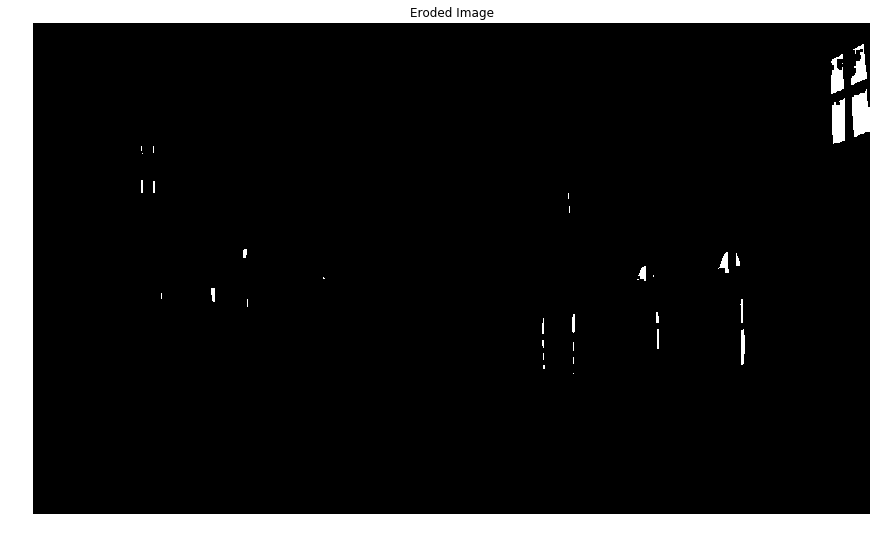

In [11]:
plt.figure(figsize=(15, 15))
plt.imshow(eroded_img, cmap='gray')
plt.axis('off')
plt.title('Eroded Image')
plt.show()

In [12]:
dilated_image = cv2.dilate(mask_img, kernel)

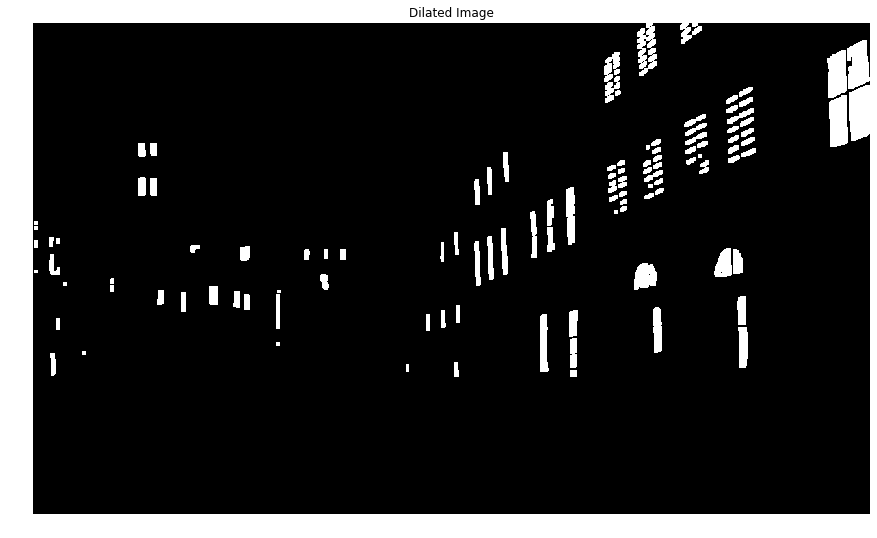

In [13]:
plt.figure(figsize=(15, 15))
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')
plt.title('Dilated Image')
plt.show()

In [14]:
closing_image = cv2.morphologyEx(mask_img, cv2.MORPH_CLOSE, kernel)

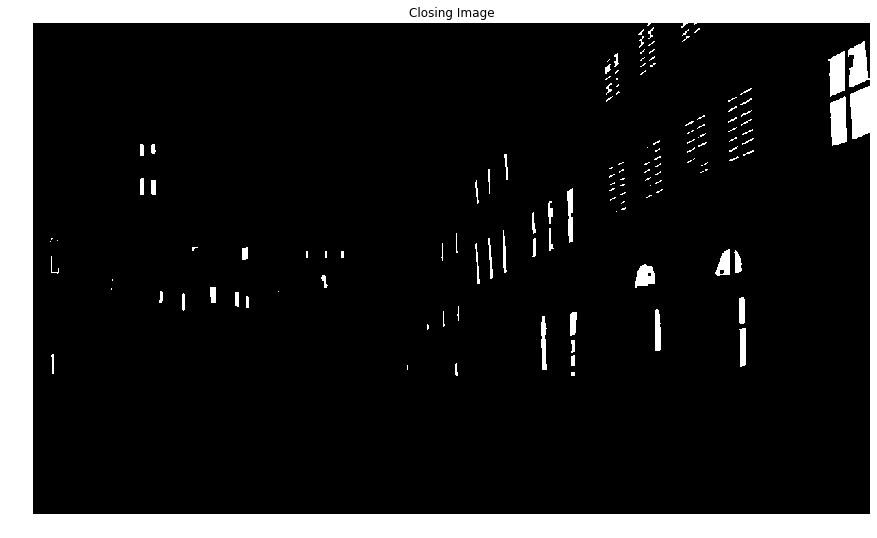

In [15]:
plt.figure(figsize=(15, 15))
plt.imshow(closing_image, cmap='gray')
plt.axis('off')
plt.title('Closing Image')
plt.show()

In [16]:
opening_image = cv2.morphologyEx(mask_img, cv2.MORPH_OPEN, kernel)

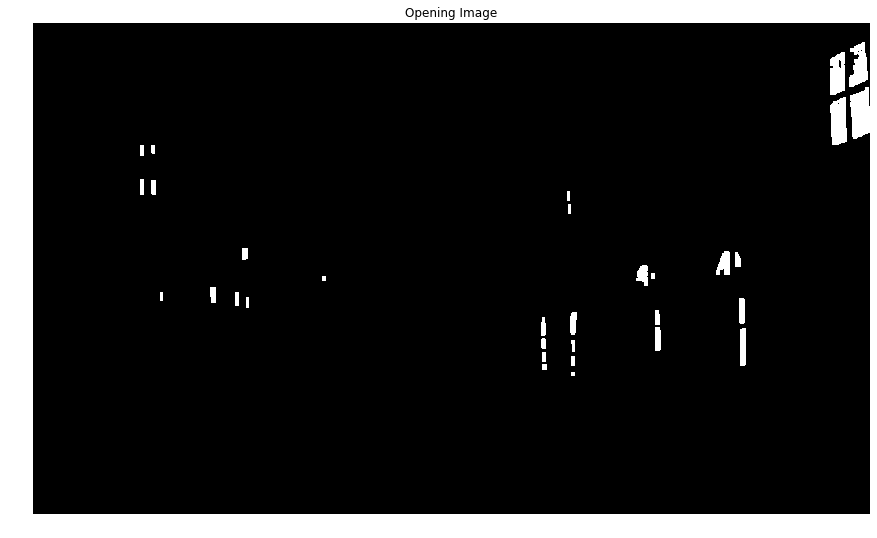

In [17]:
plt.figure(figsize=(15, 15))
plt.imshow(opening_image, cmap='gray')
plt.axis('off')
plt.title('Opening Image')
plt.show()